In [1]:
# install pytorch on Google Colab
!pip install torch torchvision
!pip install torchvision

In [0]:
from tqdm import tqdm

In [0]:
# import necessary library
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
print(device)

cuda:0


In [0]:
# create Net with relu

class Net(nn.Module):
  
  # constructor
  def __init__(self, D_in, H1, H2, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
    
    
  # Forward with relu, can be replaced using tanh/sigmoid
  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = torch.relu(self.linear2(x))
    x = torch.relu(self.linear3(x))
    return x

In [0]:
# training

def train(model, criterion, train_loader, validation_loader, optimizer, epoch = 100):
  log = {'train_loss':[], 'validation_accuracy': []}
  
  for e in tqdm(range(epoch)):
    for i , (x,y) in enumerate(train_loader):
      x = x.to(device)
      y = y.to(device)
      
      # zero the grads
      optimizer.zero_grad()
      # prediction
      y_hat = model(x.view(-1, 28*28))
      # loss
      loss = criterion(y_hat, y)
      # grad
      loss.backward()
      # update weights
      optimizer.step()
      # record loss
      log['train_loss'].append(loss.data.item())
    
    count = 0
    
    for x,y in validation_loader:
      x = x.to(device)
      y = y.to(device)
      yhat = model(x.view(-1, 28*28))
      _, label = torch.max(yhat, 1)
      count += (label == y).sum().item()
    
    accuracy = 100 * (count / len(validation_dataset))
    log['validation_accuracy'].append(accuracy)
  return log

In [0]:
# download data using torchvision.datasets
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            download=True, 
                            transform=transforms.ToTensor())

In [0]:
validation_dataset = dsets.MNIST(root='./data', 
                                 train=False, 
                                 download=True, 
                                 transform=transforms.ToTensor())

In [0]:
# using building corssentropyloss as criterion 
criterion = nn.CrossEntropyLoss()

In [0]:
# using torch.utils.data.DataLoader to convert data format
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=2000, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, 
                                                batch_size=5000, 
                                                shuffle=False)

In [0]:
# Model parameter
input_dim = 28 * 28
hidden_dim1 = 100
hidden_dim2 = 100
output_dim = 10

# epoch
epochs = 100

# train parameter
lr = 0.01

# model initiation 
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = lr)


In [12]:
# training
results = train(model, criterion, train_loader, validation_loader, optimizer, epochs)

100%|██████████| 100/100 [08:49<00:00,  5.43s/it]


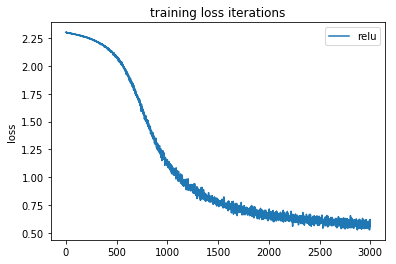

In [13]:
plt.plot(results['train_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

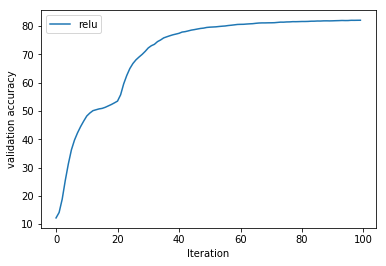

In [14]:
plt.plot(results['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()